In [5]:
import pandas as pd
import numpy as np
import os
import re, string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input, LSTM,Embedding,Dropout,Activation
from keras.layers import Bidirectional,GlobalMaxPool1D
from keras.models import Model
from keras import initializers,regularizers,constraints,optimizers,layers

In [6]:
train=pd.read_csv(os.path.join(os.getcwd(),'data/toxic_comments/train.csv'))
test=pd.read_csv(os.path.join(os.getcwd(),'data/toxic_comments/test.csv'))

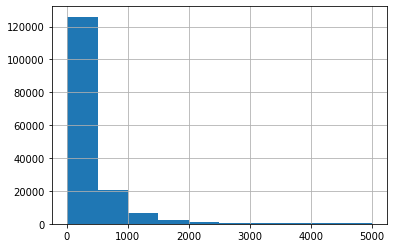

In [10]:
train.comment_text.str.len().hist()

In [15]:
list_classes=['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
y=train[list_classes].values
list_sentences_train=train['comment_text']
list_sentences_test=test['comment_text']

## Steps:
- Tokennization - break down setence into unique words
- Indexing - put words into a dict-like structure
- Index Representation - represent the sequence of words in the form of index, feed this chain of index into LSTM

In [24]:
max_features =20000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train=tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test=tokenizer.texts_to_sequences(list_sentences_test)

In [34]:
# tokenizer.word_counts